# Naive Bayes

In [1]:
import sklearn.datasets as sk_datasets
import sklearn.preprocessing as sk_preprocessing
import sklearn.naive_bayes as sk_naive_bayes
import sklearn.metrics as sk_metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import imblearn.over_sampling as imb_over_sampling

Load and examine the iris dataset.

In [2]:
df = sk_datasets.load_wine(as_frame=True).frame
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [3]:
for unique_target in df.target.unique():
    print(f"Target {unique_target} has {df[df.target == unique_target].shape[0]} samples")

Target 0 has 59 samples
Target 1 has 71 samples
Target 2 has 48 samples


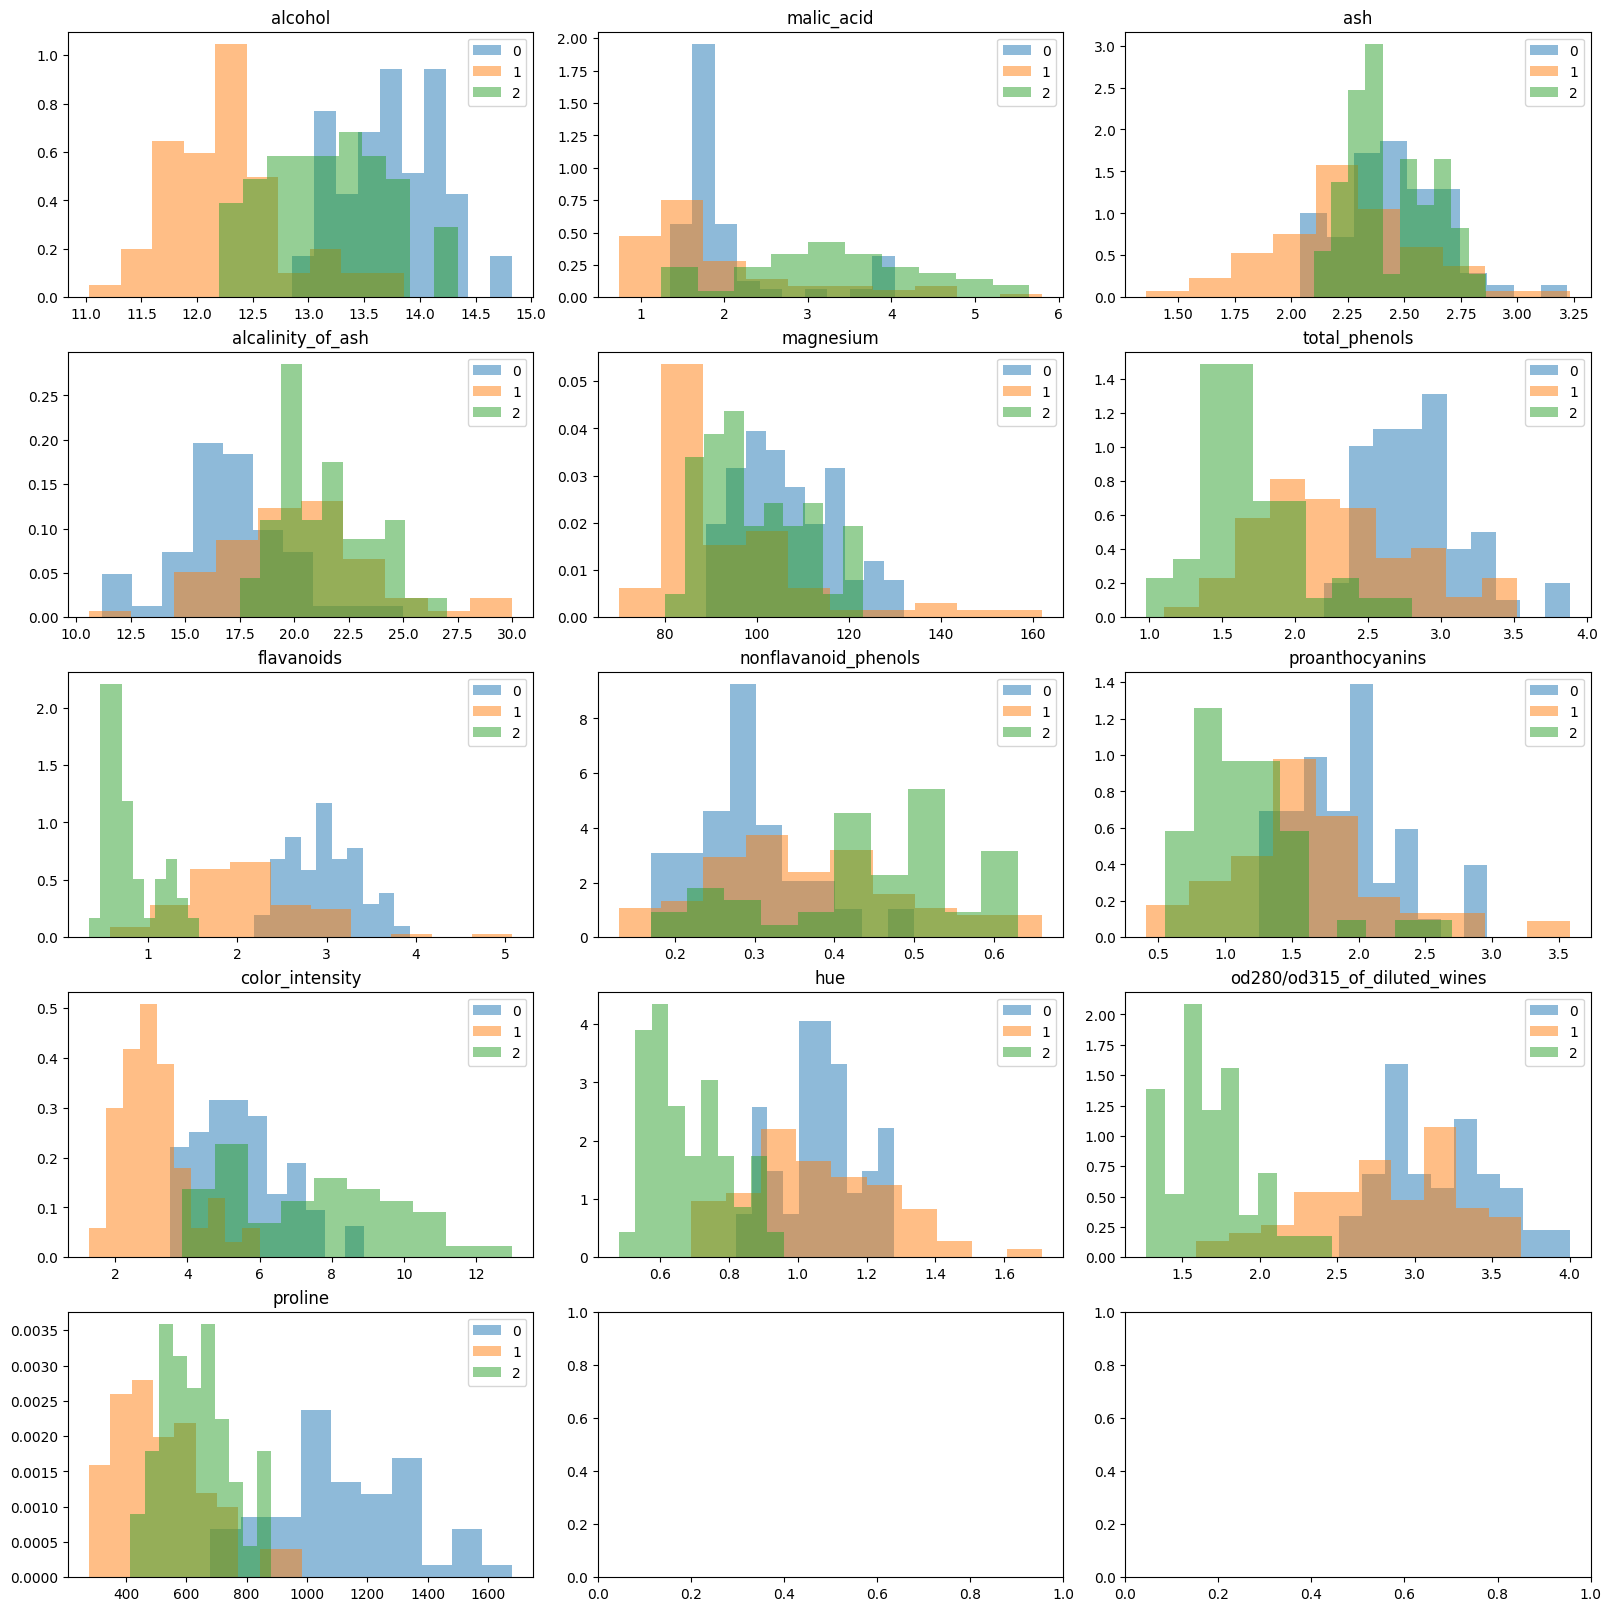

In [4]:
unique_labels = df['target'].unique()
features = df.columns[:-1]

fig, axs = plt.subplots(ncols=3, nrows=5, figsize=(16, 16), layout='constrained')

for i, label in enumerate(features):
    axis = axs[i // 3][i % 3]
    for unique_label in unique_labels:
        axis.hist(df[label][df['target'] == unique_label], alpha=0.5, label=unique_label, density=True)
    axis.set_title(label)
    axis.legend()

plt.show()

Transform and prepare data.

In [5]:
train, test = np.split(df.sample(frac=1), [int(.8*len(df))])

/Users/philipcastiglione/.asdf/installs/python/3.12.2/lib/python3.12/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [6]:
def scale_dataset(dataframe: pd.DataFrame, oversample=False):
    X = dataframe[dataframe.columns[:-1]].values
    y = dataframe['target'].values

    scaler = sk_preprocessing.StandardScaler()
    X = scaler.fit_transform(X)

    if oversample:
        ros = imb_over_sampling.RandomOverSampler()

        X, y = ros.fit_resample(X, y)
    
    data = np.hstack((X, y.reshape(-1, 1)))

    return data, X, y

In [7]:
train, X_train, y_train = scale_dataset(train, oversample=True)
test, X_test, y_test = scale_dataset(test)

In [8]:
nb_model = sk_naive_bayes.GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [9]:
y_pred = nb_model.predict(X_test)
print(sk_metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.94      1.00      0.97        15
           2       1.00      0.92      0.96        13

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.98        36
weighted avg       0.97      0.97      0.97        36

